In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys

sys.path.append("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/code_descriptors_postural_control-main/code_descriptors_postural_control-main")
from stabilogram.stato import Stabilogram
#sys.path.append("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/Lib")
from descriptors import compute_all_features



In [21]:
forceplate_file_selected = "test.csv"

In [22]:
data_forceplatform = pd.read_csv(forceplate_file_selected,header=[31],sep=",",index_col=0)
data_forceplatform.head()

,MocapTime,DeviceFrame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz
MocapFrame,,,,,,,,,,,
0,0.00,0,1.622131,-8.233887,581.4375,-37.412109,-12.184570,3.460205,0.020956,-0.064344,0.0
1,0.01,1,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.02,2,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.03,3,1.216919,-7.369629,582.3125,-38.582031,-12.597168,3.246948,0.021633,-0.066257,0.0
4,0.04,4,0.894653,-7.661621,582.3125,-38.800781,-12.507324,3.155640,0.021479,-0.066632,0.0


In [24]:
dft = data_forceplatform
X = dft.get(" My")/dft.get(" Fz")
Y = dft.get(' Mx')/ dft.get(' Fz')
X = X - np.mean(X)
Y = Y - np.mean(Y)
X = 100*X
Y = 100*Y

X = X.to_numpy()[4000:7000]
Y= Y.to_numpy()[4000:7000]

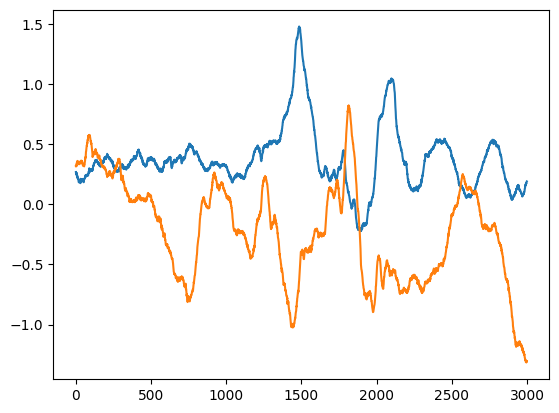

In [25]:
plt.plot(X)
plt.plot(Y)

In [42]:
type(X)

numpy.ndarray

In [26]:
data = np.array([X,Y]).T


In [38]:
data

array([[ 0.26803128,  0.3179232 ],
       [ 0.25480509,  0.31892925],
       [ 0.25767756,  0.31495904],
       ...,
       [ 0.17556296, -1.30529383],
       [ 0.188365  , -1.30912389],
       [ 0.19012891, -1.30368721]])

In [43]:
valid_index = (np.sum(np.isnan(data),axis=1) == 0)
print(np.sum(valid_index),len(data))


3000 3000


In [37]:
data.shape

(3000, 2)

In [28]:
stato = Stabilogram()
stato.from_array(array=data, original_frequency=100)

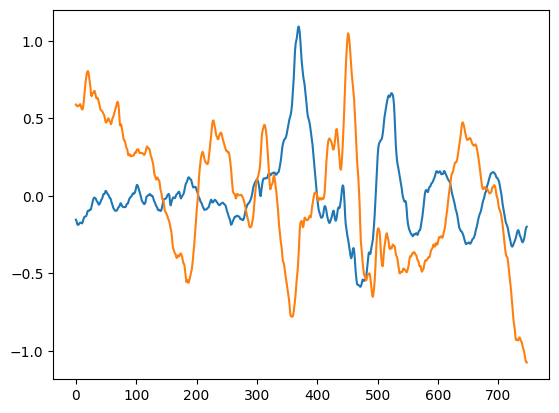

In [29]:
plt.plot(stato.medio_lateral)
plt.plot(stato.antero_posterior)

In [30]:
sway_density_radius = 0.3 # 3 mm

params_dic = {"sway_density_radius": sway_density_radius}

features = compute_all_features(stato, params_dic=params_dic)


In [31]:
features

{'mean_value_ML': 0.3740821161844198,
 'mean_value_AP': -0.23424815039801114,
 'mean_distance_ML': 0.17958109553112522,
 'mean_distance_AP': 0.34804323313894586,
 'mean_distance_Radius': 0.4254325412234754,
 'maximal_distance_ML': 1.0934116824820326,
 'maximal_distance_AP': 1.076085490398158,
 'maximal_distance_Radius': 1.171563852857063,
 'rms_ML': 0.26540984939429485,
 'rms_AP': 0.41648441647296885,
 'rms_Radius': 0.49386400690912036,
 'range_ML': 1.6807988285326032,
 'range_AP': 2.1256765044334687,
 'range_ML_AND_AP': 2.127255063910085,
 'range_ratio_ML_AND_AP': 0.7907124273270201,
 'planar_deviation_ML_AND_AP': 0.4938640069091203,
 'coefficient_sway_direction_ML_AND_AP': -0.2329489848929669,
 'confidence_ellipse_area_ML_AND_AP': 2.0369975463044216,
 'principal_sway_direction_ML_AND_AP': 13.280808808239561,
 'mean_velocity_ML': 0.3581913643625228,
 'mean_velocity_AP': 0.5203914302706961,
 'mean_velocity_ML_AND_AP': 0.6953667708089499,
 'sway_area_per_second_ML_AND_AP': 0.09587003176